In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn import preprocessing

# Límite Superior de Confianza

In [2]:
#Apertura de archivo csv a un dataframe de pandas

#revisar la ruta para tu caso particular
ruta = "c:\\Users\\jrgui\\Documents\\GitHub\\Machine_Learning\\Aprendizaje_por_Refuerzo\\datasets\\Ads_CTR_Optimisation.csv"
dataset = pd.read_csv(ruta)
dataset.head(5)

# El dataset es de 10 anuncios y 
# sobre 10 000 usuarios que hacen click sobre el anuncio

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


Número de anuncios clickeados de la selección aleatoria: 1268


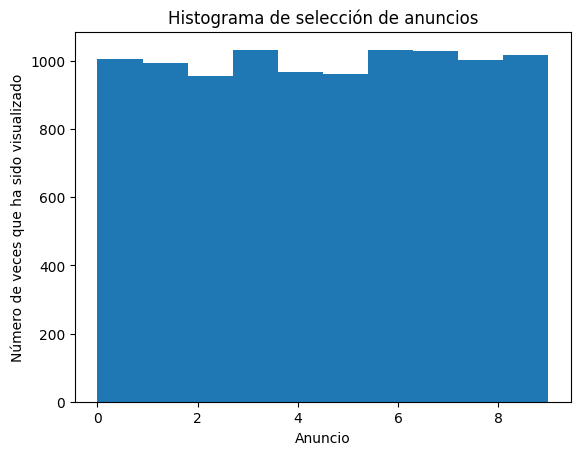

In [3]:
#Seleccion aleatoria
#para cada uno de las filas(usuarios) se escoge uno de las columnas(anuncios)

import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    #numero de usuarios han dado click a anuncion predicho
    total_reward = total_reward + reward

print("Número de anuncios clickeados de la selección aleatoria:",total_reward)

# Visualizar los resultados - Histograma
plt.hist(ads_selected)
plt.title('Histograma de selección de anuncios')
plt.xlabel('Anuncio')
plt.ylabel('Número de veces que ha sido visualizado')
plt.show()

In [4]:
#Algoritmo Limite Superior de Confianza (UCB)
#Con un dataset estatico, es una simulacion
import math

N=10000 #numero de rondas o usuarios
d=10  #numero de anuncios

numero_de_seleccion = [0]*d
suma_de_recompezas = [0]*d
anuncios_seleccionados = []
recompenza_total = 0

for i in range(0,N):
    max_limite_superior=0
    anuncio=0

    for n in range(0,d):
        if (numero_de_seleccion[n]>0):
          #Calculo del limite superior
            #recompenza media
            recompensa_media = suma_de_recompezas[n] / numero_de_seleccion[n]
            #delta
            delta_n = math.sqrt(3/2*math.log(i+1) / numero_de_seleccion[n])
            #Intevalo de recompenza superior
            limite_superior = recompensa_media + delta_n
        else:
            limite_superior = 1e400
            #Guarda el limite superior maximo y el anuncio
        if  limite_superior > max_limite_superior:
              max_limite_superior = limite_superior
              anuncio = n
    
    anuncios_seleccionados.append(anuncio)
    numero_de_seleccion[anuncio] = numero_de_seleccion[anuncio] + 1
    recompensa = dataset.values[i, anuncio]
    suma_de_recompezas[anuncio] = suma_de_recompezas[anuncio] + recompensa
    recompenza_total = recompenza_total + recompensa

print("Número de anuncios clickeados con limite de confianza superior:",recompenza_total)


Número de anuncios clickeados con limite de confianza superior: 2178


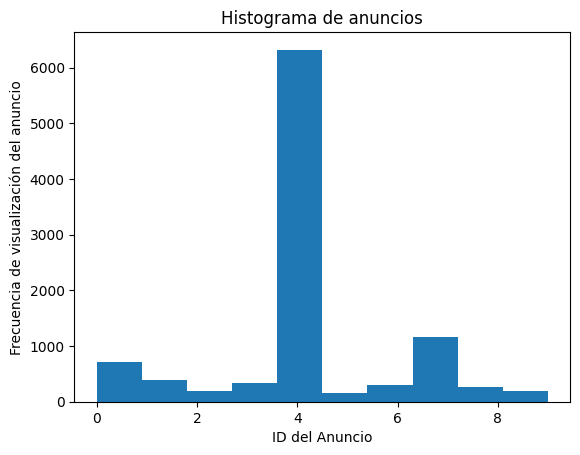

In [5]:
#Visualizacon de los resultados del algoritmo limite superior de confianza

# Histograma de resultados
plt.hist(anuncios_seleccionados)
plt.title("Histograma de anuncios")
plt.xlabel("ID del Anuncio")
plt.ylabel("Frecuencia de visualización del anuncio")
plt.show()